In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
import pickle
import networkx as nx
import ipywidgets
from ipywidgets import widgets

from run_simulation import invasion_main

# Running and Visualizing One Simulation

In [2]:
weeks_run = 15
simulation_df = invasion_main(weeks_run) # Change this to change the number of weeks
# print(type(simulation_df))
simulation_df

,County,Week 0,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14,Week 15
0,Cook,0.1,6.646434e-02,0.359142,0.509453,0.605376,0.518163,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1,DuPage,0.0,8.753926e-02,0.140369,0.224322,0.586388,0.893744,1.000000,1.000000,1.000000,0.952394,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,Kane,0.3,3.615070e-01,0.431533,0.472696,0.615643,0.211801,0.356267,0.849165,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.884801,1.0
3,Will,0.0,8.103946e-02,0.327300,0.409698,0.757516,0.887066,0.883716,1.000000,1.000000,1.000000,0.915458,1.000000,1.000000,1.000000,1.000000,1.0
4,Winnebago,0.0,0.000000e+00,0.358151,0.774622,1.000000,0.913136,0.867136,1.000000,1.000000,0.674207,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Henderson,0.0,3.000000e-07,0.000000,0.001552,0.000000,0.028594,0.093252,0.323561,0.624373,0.895916,0.576363,0.660346,1.000000,1.000000,1.000000,1.0
98,Calhoun,0.0,1.778900e-03,0.072247,0.101296,0.210542,0.289662,0.595044,0.584731,1.000000,1.000000,1.000000,0.553768,0.000000,0.903135,1.000000,1.0
99,Schuyler,0.0,0.000000e+00,0.000024,0.002412,0.005298,0.015671,0.042596,0.107042,0.110446,0.242884,0.713264,1.000000,1.000000,1.000000,0.968610,1.0
100,Gallatin,0.0,0.000000e+00,0.000108,0.000458,0.001255,0.001534,0.004195,0.020081,0.088601,0.129022,0.181822,0.148584,0.632245,1.000000,1.000000,1.0


In [3]:
def make_visual_df(simulation_df):
    visual_df = simulation_df.T
    visual_df.columns = visual_df.iloc[0]
    visual_df = visual_df.drop(visual_df.index[0])
    return visual_df

visual_df = make_visual_df(simulation_df)
visual_df

County,Cook,DuPage,Kane,Will,Winnebago,Lake,McHenry,St. Clair,Kendall,Madison,...,Scott,Stark,Jasper,Hamilton,Pike,Henderson,Calhoun,Schuyler,Gallatin,Pope
Week 0,0.1,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Week 1,0.066464,0.087539,0.361507,0.081039,0.0,0.0,0.110455,0.022398,0.0,0.522431,...,0.001368,0.000151,0.000344,0.0,0.00121,0.0,0.001779,0.0,0.0,0.0
Week 2,0.359142,0.140369,0.431533,0.3273,0.358151,0.0,0.042424,0.0,0.0,0.549181,...,0.007958,0.0,0.019851,0.000444,0.000648,0.0,0.072247,0.000024,0.000108,0.0
Week 3,0.509453,0.224322,0.472696,0.409698,0.774622,0.053741,0.113747,0.019571,0.204934,0.640954,...,0.01693,0.006285,0.062271,0.000244,0.006922,0.001552,0.101296,0.002412,0.000458,0.0
Week 4,0.605376,0.586388,0.615643,0.757516,1.0,0.243392,0.118637,0.084547,0.609215,0.635064,...,0.060897,0.005381,0.09774,0.001089,0.037925,0.0,0.210542,0.005298,0.001255,0.000039
Week 5,0.518163,0.893744,0.211801,0.887066,0.913136,0.570259,0.53814,0.146429,0.952452,0.931833,...,0.108247,0.246989,0.089909,0.001697,0.11206,0.028594,0.289662,0.015671,0.001534,0.000424
Week 6,1.0,1.0,0.356267,0.883716,0.867136,0.734234,1.0,0.026361,1.0,1.0,...,0.113856,0.403501,0.295376,0.035468,0.151449,0.093252,0.595044,0.042596,0.004195,0.000724
Week 7,1.0,1.0,0.849165,1.0,1.0,1.0,1.0,0.179876,1.0,1.0,...,0.081411,0.536664,0.726906,0.088544,0.252423,0.323561,0.584731,0.107042,0.020081,0.00286
Week 8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.362775,1.0,0.894914,...,0.629315,0.863098,0.930272,0.110438,0.927002,0.624373,1.0,0.110446,0.088601,0.01802
Week 9,1.0,0.952394,1.0,1.0,0.674207,0.0,1.0,0.977962,1.0,1.0,...,0.974114,1.0,1.0,0.106422,1.0,0.895916,1.0,0.242884,0.129022,0.032497


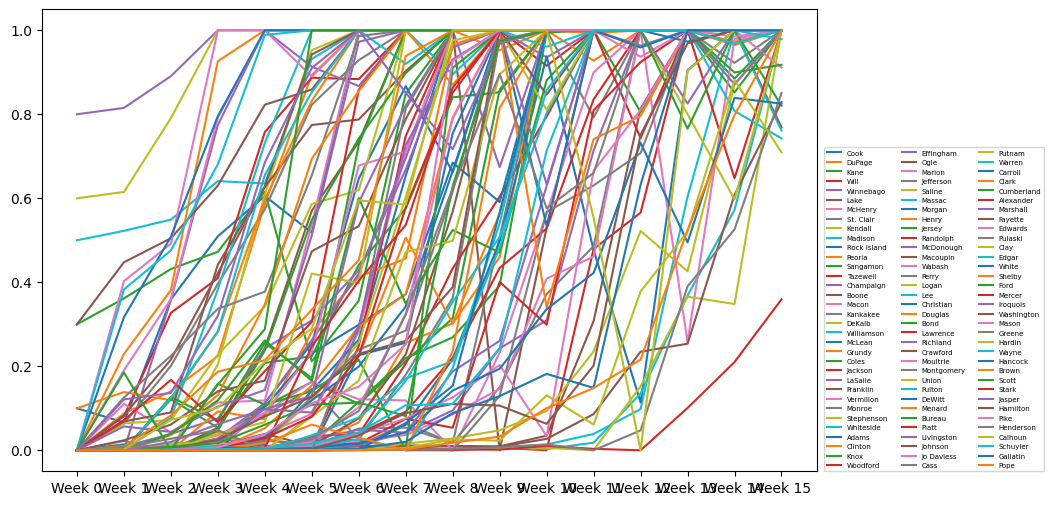

In [4]:
plt.figure(figsize=(10,6))
for county in visual_df.columns:
    plt.plot(visual_df.index, visual_df[county])
plt.legend(visual_df.columns, loc=(1.01, 0), fontsize=5, ncol=3)
plt.show()

In [5]:
path = 'data/location'
edges = pd.read_csv(f'{path}/county_edges.csv')

CG = pickle.load(open(f'{path}/IL_graph.dat', 'rb'))
handler = pickle.load(open(f'{path}/graph_handler_counties.dat', 'rb'))
highways = pickle.load(open(f'{path}/osmnx_highways.dat', 'rb'))

In [6]:
def make_network_heat(week):
    week = f'Week {week}'
#     min_value = simulation_df[week].min()
#     max_value = simulation_df[week].max()  # This makes the scale variable for each chart
    max_value = 1  # This keeps the scale constant 
    min_value = 0
    cmap = matplotlib.colormaps['YlOrRd']

    node_colors = {}
    for node in CG.nodes():
        value = simulation_df.loc[simulation_df['County'] == node.name, week].iloc[0]
        normalized_value = (value - min_value) / (max_value - min_value)
        node_colors[node.name] = cmap(normalized_value)

    labels = {node: handler[node.name].name for node in CG.nodes()}
    fig, ax = plt.subplots(figsize=(10, 15))
    node_positions = {node: [node.centroid.x, node.centroid.y] for node in CG.nodes()}
    nx.draw(CG, 
            pos=node_positions,
            ax=ax, 
            node_color=[node_colors.get(node.name, 'gray') for node in CG.nodes()],
            node_size=1500, )

    nx.draw_networkx_labels(CG, 
                            pos=node_positions, 
                            labels=labels,
                            font_size=6, 
                            ax=ax,
                           font_color='k')

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_value, vmax=max_value))
    sm.set_array([])
    sub_ax = plt.axes([0.96, 0.55, 0.02, 0.3])
    plt.colorbar(sm, cax=sub_ax)
    plt.show()

In [7]:
widgets.interact(make_network_heat,
    week=widgets.IntSlider(min=0, max=len(simulation_df.columns)-2, step=1, layout=widgets.Layout(width='800px')),
)

interactive(children=(IntSlider(value=0, description='week', layout=Layout(width='800px'), max=15), Output()),…

<function __main__.make_network_heat(week)>

In [8]:
# This doesn't work very well for me since the page keeps re-centering

play = widgets.interact(make_network_heat, 
    week=widgets.Play( value=0,
                        min=0,
                        max=len(simulation_df.columns) - 2,
                        step=1,
                        interval=500,
                        disabled=False
                    ))

interactive(children=(Play(value=0, description='week', interval=500, max=15), Output()), _dom_classes=('widge…

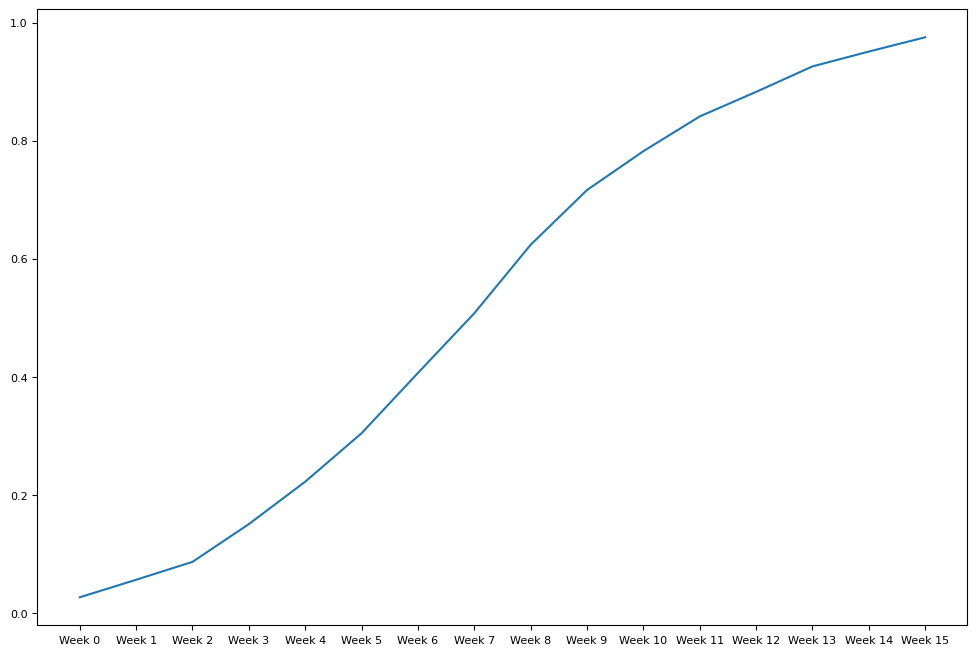

In [9]:
avg_df = visual_df.mean(axis=1)
plt.figure(figsize=(12,8))
plt.plot(avg_df.index, avg_df.iloc[0:, ])
plt.tick_params(labelsize=8)

# Repeating the Simulation and Plotting the Results

In [10]:
def make_average_graphs(df):
    vis_df = make_visual_df(df)
    avg_df = vis_df.mean(axis=1)
    plt.plot(avg_df.index, 
             avg_df.iloc[0:, ],
             linewidth=0.5)

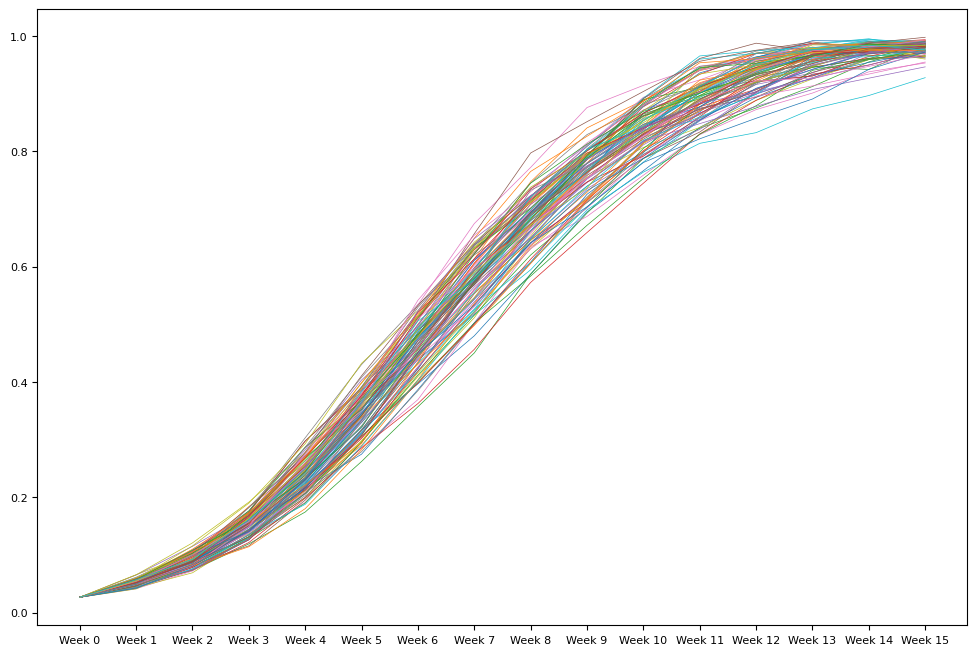

In [11]:
plt.figure(figsize=(12,8))
plt.tick_params(labelsize=8)

sims_run = 100  # RIP my RAM
sim_weeks = 15
for i in range(0, sims_run):
    df = invasion_main(sim_weeks)
    make_average_graphs(df)

plt.show()